<a href="https://colab.research.google.com/github/Hubobv/Midterms_test/blob/main/face_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from os import listdir
import numpy as np
from numpy import save
from keras.utils import to_categorical, load_img, img_to_array
from keras.models import Sequential,Model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, LeakyReLU, Activation, Dropout
from keras.optimizers import Adam,SGD
import matplotlib.pyplot as plt

# specify the folder here
folder = '/content/drive/MyDrive/face/'

photos, labels = list(), list()

for file in listdir(folder):
    output = None
    if file.startswith('phuc'):
        output = 0
    if file.startswith('Phat'):
        output = 1
    if file.startswith('duy'):
        output = 2
    if output is not None:
      photo = load_img(folder + file, target_size=(200, 200, 3))
      photo = img_to_array(photo)
      photos.append(photo)
      labels.append(output)

photos = np.array(photos)
labels = np.array(labels)

# Normalize images
photos= photos.astype('float32')/255

# One-hot encode labels
labels = to_categorical(labels,10)

# Save photos and labels to disk
save('/content/drive/MyDrive/monan/face_photos.npy', photos)
save('/content/drive/MyDrive/monan/face_labels.npy', labels)

# Define the model
model = Sequential()
model.add(Conv2D(32,(3,3), padding='same', input_shape=(200, 200,3)))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
#model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
from keras.losses import categorical_crossentropy
sgd = SGD(lr = 0.001, decay = 1e-6, momentum = 0.8, nesterov= True)
model.compile(loss= categorical_crossentropy, optimizer= sgd, metrics = ['accuracy'])
classes=['phuc','Phat','duy']
# Train the model
train = model.fit(photos, labels, batch_size=64, epochs=30, verbose=1)

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/30
3/3 [==============================] - 17s 2s/step - loss: 2.1096 - accuracy: 0.2189
Epoch 2/30
3/3 [==============================] - 1s 196ms/step - loss: 1.4359 - accuracy: 0.3195
Epoch 3/30
3/3 [==============================] - 1s 199ms/step - loss: 1.0254 - accuracy: 0.6036
Epoch 4/30
3/3 [==============================] - 1s 199ms/step - loss: 0.8414 - accuracy: 0.6391
Epoch 5/30
3/3 [==============================] - 1s 208ms/step - loss: 0.6686 - accuracy: 0.7456
Epoch 6/30
3/3 [==============================] - 1s 205ms/step - loss: 0.5184 - accuracy: 0.8107
Epoch 7/30
3/3 [==============================] - 1s 206ms/step - loss: 0.3944 - accuracy: 0.8521
Epoch 8/30
3/3 [==============================] - 1s 204ms/step - loss: 0.2644 - accuracy: 0.9408
Epoch 9/30
3/3 [==============================] - 1s 203ms/step - loss: 0.1811 - accuracy: 0.9527
Epoch 10/30
3/3 [==============================] - 1s 200ms/step - loss: 0.1247 - accuracy: 0.9704
Epoch 11/30
3/3 [====

In [ ]:
from keras.models import load_model
model.save('model4.h5')

1/1 [==============================] - 0s 330ms/step
[[3.4110550e-02 9.5836216e-01 7.5212023e-03 1.2732912e-06 2.7007670e-07
  2.1220580e-06 1.2688952e-07 7.3503361e-07 7.5037411e-07 7.9230432e-07]]


'Phat'

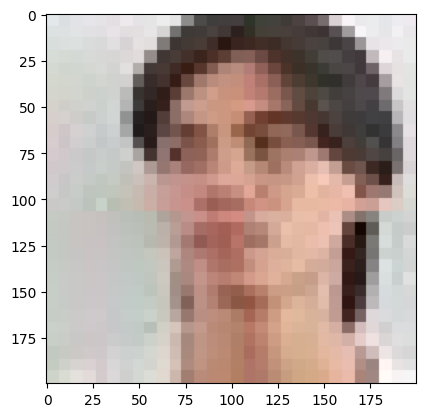

In [ ]:
from keras.utils import load_img
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
model10=load_model('model4.h5')
img=load_img('/content/drive/MyDrive/Phat (6).jpg', target_size=(200,200)) 
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,200,200,3)  
img = img.astype('float32')
img /= 255
y_pred = model10.predict(img)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]